In [1]:
# Import Libraries

import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')

# Check TensorFlow version
print(tf.__version__)


2.15.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('data_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19540 entries, 0 to 19539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  19540 non-null  object
 1   Rating  19540 non-null  object
dtypes: object(2)
memory usage: 305.4+ KB


## Handling Duplicate

In [3]:
df.duplicated().sum()

0

In [4]:
df = df.drop_duplicates()

In [5]:
df.duplicated().sum()

0

## Handling Missing Value

In [6]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [7]:
df = df.dropna()

# Text Preprocessing

In [8]:
# Define Stopwords
from nltk.corpus import stopwords
stpwds_id = list(set(stopwords.words('indonesian')))

# Define Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

In [9]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_id]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

In [10]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Target Conversion

In [11]:
# Applying Text Preprocessing to the Dataset

df['Review_processed'] = df['Review'].apply(lambda x: text_preprocessing(x))
df

,Review,Rating,Review_processed
0,Beli Online memang paling aman di official store,bintang 5,beli online aman official store
1,"Barang masih di segel, tepat waktu, dan packin...",bintang 5,barang segel packing bagus barang luka
2,"mantab greget, penguriman aman,sampai tujuan s...",bintang 5,mantab greget penguriman aman tuju selamat
3,"pertama kali beli online, aman. packing rapi",bintang 5,kali beli online aman packing rapi
4,"Barang bagus, berfungsi dengan baik, untuk pen...",bintang 4,barang bagus fungsi kirim poko mantab sayang g...
...,...,...,...
19535,Pesanan sudah diterima dengan baik packing ama...,bintang 5,pesan terima packing aman n kirim cepet banget...
19536,"pengiriman aman dan cepat,,terima kasih.",bintang 5,kirim aman cepat terima kasih
19537,Mantap deh buat poco Indonesia barang bagus pe...,bintang 5,mantap deh poco indonesia barang bagus kirim c...
19538,Barang original dan masih segel. Pengiriman ju...,bintang 5,barang original segel kirim cepat


In [12]:
# Menghapus kata 'bintang' pada kolom 'Rating'
df['Rating'] = df['Rating'].str.replace('bintang', '')

# Mengubah kolom Rating menjadi numerik
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df

,Review,Rating,Review_processed
0,Beli Online memang paling aman di official store,5,beli online aman official store
1,"Barang masih di segel, tepat waktu, dan packin...",5,barang segel packing bagus barang luka
2,"mantab greget, penguriman aman,sampai tujuan s...",5,mantab greget penguriman aman tuju selamat
3,"pertama kali beli online, aman. packing rapi",5,kali beli online aman packing rapi
4,"Barang bagus, berfungsi dengan baik, untuk pen...",4,barang bagus fungsi kirim poko mantab sayang g...
...,...,...,...
19535,Pesanan sudah diterima dengan baik packing ama...,5,pesan terima packing aman n kirim cepet banget...
19536,"pengiriman aman dan cepat,,terima kasih.",5,kirim aman cepat terima kasih
19537,Mantap deh buat poco Indonesia barang bagus pe...,5,mantap deh poco indonesia barang bagus kirim c...
19538,Barang original dan masih segel. Pengiriman ju...,5,barang original segel kirim cepat


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19540 entries, 0 to 19539
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review            19540 non-null  object
 1   Rating            19540 non-null  int64 
 2   Review_processed  19540 non-null  object
dtypes: int64(1), object(2)
memory usage: 458.1+ KB


In [14]:
def rate(bintang):
    if bintang > 3:
        return 'Positive'
    elif bintang <= 3:
        return 'Negative'

df['Rating'] = df['Rating'].apply(rate)


In [15]:
# Change Target into Number

df['label'] = df['Rating'].replace({'Negative' : 0,'Positive' : 1})
df

,Review,Rating,Review_processed,label
0,Beli Online memang paling aman di official store,Positive,beli online aman official store,1
1,"Barang masih di segel, tepat waktu, dan packin...",Positive,barang segel packing bagus barang luka,1
2,"mantab greget, penguriman aman,sampai tujuan s...",Positive,mantab greget penguriman aman tuju selamat,1
3,"pertama kali beli online, aman. packing rapi",Positive,kali beli online aman packing rapi,1
4,"Barang bagus, berfungsi dengan baik, untuk pen...",Positive,barang bagus fungsi kirim poko mantab sayang g...,1
...,...,...,...,...
19535,Pesanan sudah diterima dengan baik packing ama...,Positive,pesan terima packing aman n kirim cepet banget...,1
19536,"pengiriman aman dan cepat,,terima kasih.",Positive,kirim aman cepat terima kasih,1
19537,Mantap deh buat poco Indonesia barang bagus pe...,Positive,mantap deh poco indonesia barang bagus kirim c...,1
19538,Barang original dan masih segel. Pengiriman ju...,Positive,barang original segel kirim cepat,1


In [16]:
# Target Distribution
df['label'].value_counts()

label
1    18850
0      690
Name: count, dtype: int64

In [17]:
# Count the occurrences of each label
label_counts = df["label"].value_counts()

# Get the number of rows to drop from the majority class
rows_to_drop = label_counts.max() - label_counts.min()

# Drop rows from the majority class randomly
if rows_to_drop > 0:
    df_majority = df[df["label"] == label_counts.idxmax()]  # Majority class
    df_balanced = df.drop(df_majority.sample(rows_to_drop).index)
else:
    df_balanced = df.copy()

# Check the new class balance
print(df_balanced["label"].value_counts())


label
1    690
0    690
Name: count, dtype: int64


# Data Splitting

In [18]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df_balanced.Review_processed,
                                                    df_balanced.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df_balanced.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1055,)
Val Size   :  (118,)
Test Size  :  (207,)


In [19]:
# Change Target to One Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## Text Vectorization

In [20]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9118 stored elements and shape (1055, 1991)>

In [21]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  1991
Maximum Sentence Length :  26 tokens


In [22]:
# Text Vectorization

from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [23]:
# Example Result

# Reset index
df_balanced = df_balanced.reset_index(drop=True)

## Document example
print('Document example')
print(df_balanced.Review_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df_balanced.Review_processed[0]]))
print('Vector size : ', text_vectorization([df_balanced.Review_processed[0]]).shape)

Document example
hp nya aman pakai kendala kali beli hp online kalo kasih free casing hehe kirim cepet bgt

Result of Text Vectorization
tf.Tensor(
[[ 10   4   5  41 105  63  11  10 148 117  32 230 849 793   3 129  64   0
    0   0   0   0   0   0   0   0]], shape=(1, 26), dtype=int64)
Vector size :  (1, 26)


In [24]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'barang',
 'kirim',
 'nya',
 'aman',
 'segel',
 'bagus',
 'cepat',
 'sesuai',
 'hp',
 'beli',
 'kurir',
 'terima',
 'yg',
 'pesan',
 'packing',
 'ga',
 'moga',
 'mantap']

## Word Embedding

In [25]:
# Embedding

from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [26]:
# Example Result

## Document example
print('Document example')
print(df_balanced.Review_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df_balanced.Review_processed[0]]))
print('Vector size : ', text_vectorization([df_balanced.Review_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df_balanced.Review_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df_balanced.Review_processed[0]])).shape)

Document example
hp nya aman pakai kendala kali beli hp online kalo kasih free casing hehe kirim cepet bgt

Result of  Text Vectorization
tf.Tensor(
[[ 10   4   5  41 105  63  11  10 148 117  32 230 849 793   3 129  64   0
    0   0   0   0   0   0   0   0]], shape=(1, 26), dtype=int64)
Vector size :  (1, 26)

Result of  Embedding
tf.Tensor(
[[[-0.01667406 -0.04498438  0.04174126 ...  0.04207988  0.00148904
    0.01266021]
  [ 0.02767512  0.01397708  0.03515777 ...  0.02242323 -0.03619702
    0.03120944]
  [ 0.00524294  0.00078128 -0.02581955 ... -0.02973755 -0.04725726
    0.04108573]
  ...
  [-0.03697871  0.00102236 -0.03275388 ...  0.03115961  0.02522982
   -0.04571444]
  [-0.03697871  0.00102236 -0.03275388 ...  0.03115961  0.02522982
   -0.04571444]
  [-0.03697871  0.00102236 -0.03275388 ...  0.03115961  0.02522982
   -0.04571444]]], shape=(1, 26, 128), dtype=float32)
Vector size :  (1, 26, 128)


In [27]:
# Model Training using LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(2, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=25, validation_data=(X_val, y_val_ohe))


Epoch 1/25

33/33 [==============================] - 15s 109ms/step - loss: 0.6425 - accuracy: 0.6597 - val_loss: 0.5011 - val_accuracy: 0.7797
Epoch 2/25
33/33 [==============================] - 2s 49ms/step - loss: 0.3146 - accuracy: 0.8796 - val_loss: 0.3222 - val_accuracy: 0.8898
Epoch 3/25
33/33 [==============================] - 2s 48ms/step - loss: 0.1532 - accuracy: 0.9526 - val_loss: 0.4118 - val_accuracy: 0.8814
Epoch 4/25
33/33 [==============================] - 2s 50ms/step - loss: 0.0933 - accuracy: 0.9735 - val_loss: 0.4982 - val_accuracy: 0.8644
Epoch 5/25
33/33 [==============================] - 2s 49ms/step - loss: 0.0717 - accuracy: 0.9791 - val_loss: 0.5075 - val_accuracy: 0.8729
Epoch 6/25
33/33 [==============================] - 2s 47ms/step - loss: 0.0653 - accuracy: 0.9801 - val_loss: 0.4806 - val_accuracy: 0.8729
Epoch 7/25
33/33 [==============================] - 2s 47ms/step - loss: 0.0374 - accuracy: 0.9924 - val_loss: 0.5443 - val_accuracy: 0.8898
Epoch 8/2

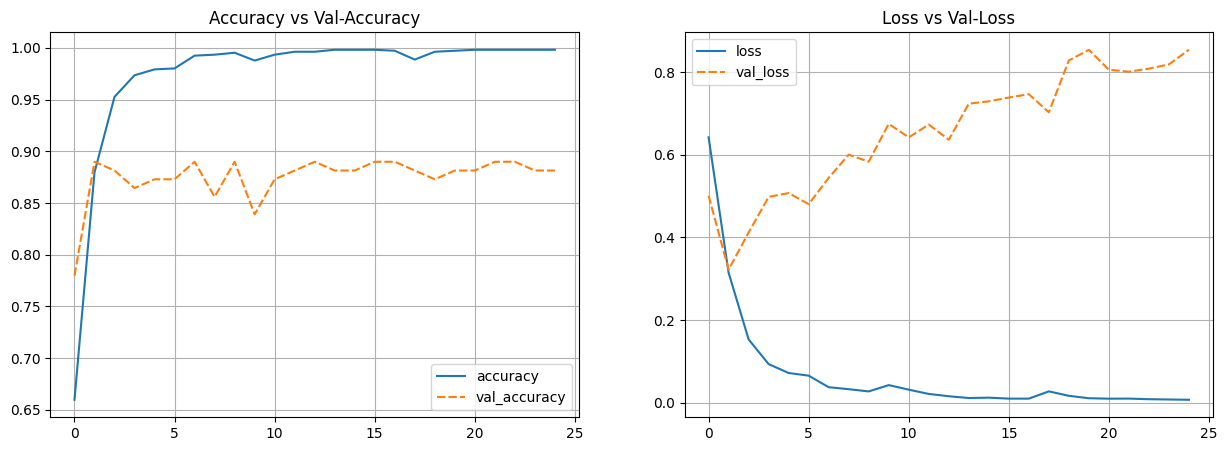

In [28]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [31]:
model_lstm_1.save('NLP_model.tf')

INFO:tensorflow:Assets written to: NLP_model.tf\assets


INFO:tensorflow:Assets written to: NLP_model.tf\assets
